# Machine Learning

## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
data = datasets.load_diabetes()
X = data.data
y = data.target
X.shape

(442, 10)

In [3]:
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


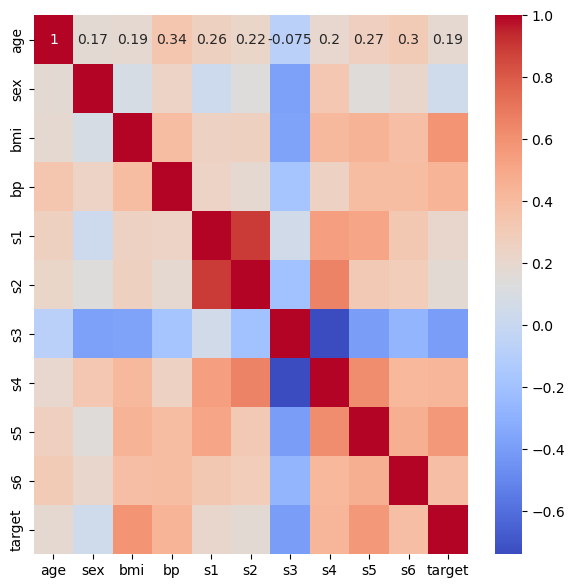

In [4]:
# finding the correlation between features and target

corr_matrix = df.corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

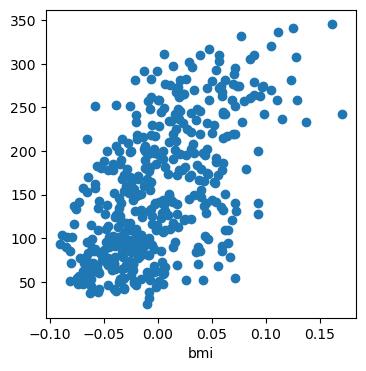

In [5]:
# selecting a feature
X = X[:, 2]

plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.xlabel(data.feature_names[2])
plt.show()

### Gradient Descent:

$$h(x) = wx + b$$

$$J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h(x^{(i)}))^2$$

$$\frac{\partial J}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} x^{(i)}(h(x^{(i)}) - y^{(i)})$$

$$\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})$$

$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

In [6]:
w = 0
b = 0

alpha = 0.1
epochs = 10000

m = len(X)

for _ in range(epochs):
    y_pred = w*X + b
    dw = (2/m) * sum(X * (y_pred-y))
    db = (2/m) * sum(y_pred-y)
    w = w - alpha * dw
    b = b - alpha * db

print(w, b)

939.1577666689885 152.13348416289608


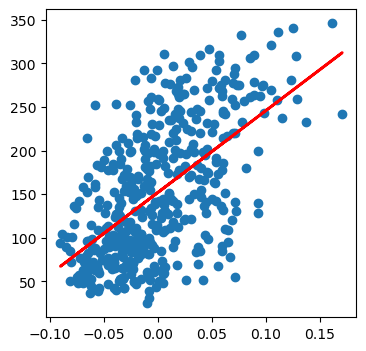

In [7]:
plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.plot(X, y_pred, color="red", linewidth=2)
plt.show()

### Polynomial Regression

Polynomial Regression finds non-linear relationship between x and y.

$$y = b_0 + b_1x + b_2x^2 + ... + b_nx^n$$

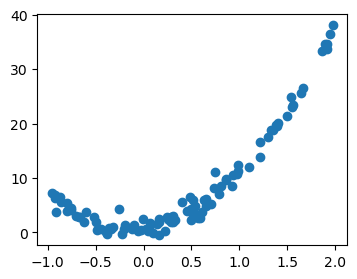

In [8]:
# generate some non-linear data
np.random.seed(2)
X = np.random.rand(100, 1) * 3 - 1
y = 8 * X**2 + 2 * X + 1 + np.random.randn(100, 1)

plt.figure(figsize=(4, 3))
plt.scatter(X, y)
plt.show()

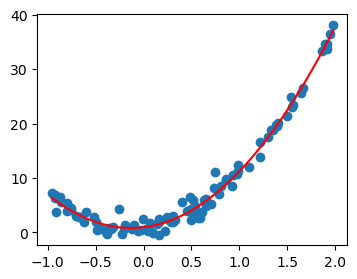

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# transform to polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# generate a continuous range of x values for plotting
x = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# transform the x values to polynomial features
x_poly = poly_features.transform(x)

y_pred = model.predict(x_poly)

plt.figure(figsize=(4, 3))
plt.scatter(X, y)
plt.plot(x, y_pred, color='red')
plt.show()

### Regularization


Ridge Regression (L2 regularization):

$$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$$


Lasso Regression (L1 regularization):

$$\min_{w} ||X w - y||_2^2 + \alpha ||w||_1$$

Elastic Net:

$$\min_{w} \frac{1}{2n_{\text{samples}}} ||X w - y||_2^2 + \alpha \lambda ||w||_1 + \frac{\alpha (1-\lambda)}{2} ||w||_2^2$$

Here, $\alpha \geq 0$ is a constant, $||w||_1$ is the L1-norm of the parameter vector, and $||w||_2^2$ is the square of the L2-norm of the parameter vector. $\lambda$ is the mix ratio.

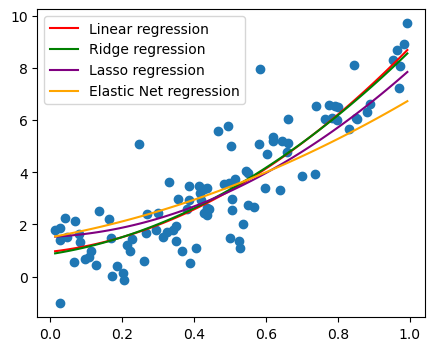

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(2)
X = np.random.rand(100, 1)
y = 5 * X**2 + 2 * X + 1 + np.random.randn(100, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_poly, y)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly, y)

x = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_poly = poly_features.transform(x)

y_pred_lin = lin_reg.predict(x_poly)
y_pred_ridge = ridge_reg.predict(x_poly)
y_pred_lasso = lasso_reg.predict(x_poly)
y_pred_elastic_net = elastic_net.predict(x_poly)

plt.figure(figsize=(5, 4))
plt.scatter(X, y)
plt.plot(x, y_pred_lin, color='red', label='Linear regression')
plt.plot(x, y_pred_ridge, color='green', label='Ridge regression')
plt.plot(x, y_pred_lasso, color='purple', label='Lasso regression')
plt.plot(x, y_pred_elastic_net, color='orange', label='Elastic Net regression')
plt.legend()
plt.show()

## Logistic Regression

For binary classification problems, it uses the logistic(sigmoid) function to model the probability that a given instance belongs to the positive class.

The logistic function is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Given input features X and parameters θ, the logistic regression model first calculates a weighted sum of the input features similar to linear regression, and then applies the logistic function to this sum:

$$\hat{p} = h_\theta(x) = \sigma(\theta^T \cdot X)$$

$\hat{p}$ is the estimated probability that the instance belongs to the positive class. For example the decision rule for a threshold of 0.5:


$$\hat{y} = 
\begin{cases} 
1, & \hat{p} \geq 0.5 \\
0, & \hat{p} < 0.5 
\end{cases}$$

The objective of logistic regression is to find the parameters θ that maximize the likelihood of the observed data. The likelihood is a measure of how probable the observed outcomes are given the parameters of the model. It measures how well the model predicts the observed class labels using the logistic function. For independent and identically distributed data, the likelihood function is a product of the individual probabilities of each data point:

$$L(\theta) = \prod_{i=1}^{m} [h_\theta(x^{(i)})]^{y^{(i)}} [1 - h_\theta(x^{(i)})]^{1 - y^{(i)}}$$

Take the logarithm, the cost function (cross-entropy loss) over the whole training set is the average cost over all instances:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})]$$

Where: $m$ is the number of instances in the training set, $y^{(i)}$ is the actual class of the ith instance, $\hat{p}^{(i)}$ is the probability that the i-th instance belongs to the positive class according to the model.

For above positive log-loss, use gradient ascent as the optimization algorithm:

$$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (p^{(i)} - y^{(i)}) x_j^{(i)}$$

$$\theta := \theta + \alpha \frac{\partial J}{\partial \theta}$$

Where $x_j^{(i)}$ is the value of the jth feature for the ith instance.

In [11]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print(X.shape, y.shape, feature_names)

(569, 30) (569,) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


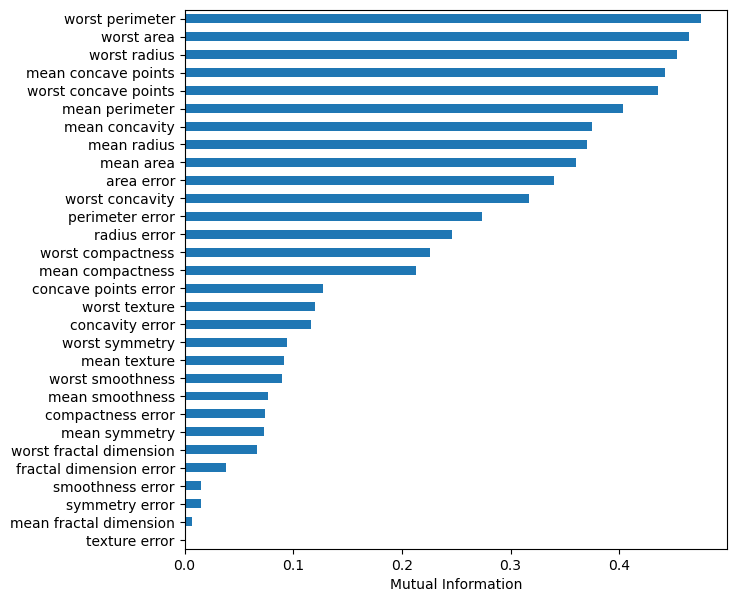

In [12]:
from sklearn.feature_selection import mutual_info_classif

# compute the mutual information
mi = mutual_info_classif(X, y)

df_mi = pd.DataFrame(mi, index=feature_names, columns=['mutual_info'])
df_mi = df_mi.sort_values('mutual_info', ascending=True)

plt.figure(figsize=(7, 7))
df_mi['mutual_info'].plot(kind='barh')
plt.xlabel('Mutual Information')
plt.show()

In [13]:
# select top 2 features
select_features = df_mi.index[-2:]
feature_indices = [list(feature_names).index(feature) for feature in select_features]
X_new = X[:, feature_indices]
X_new.shape

(569, 2)

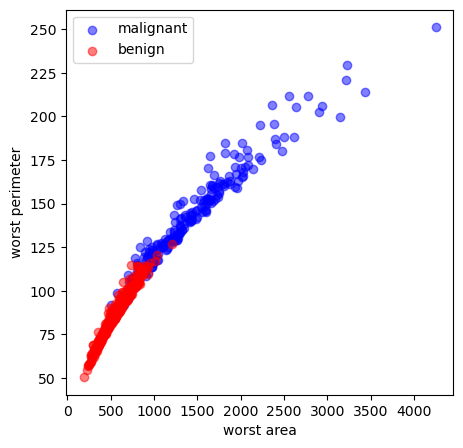

In [14]:
class_0 = y == 0
class_1 = y == 1

plt.figure(figsize=(5, 5))
plt.scatter(X_new[class_0, 0], X_new[class_0, 1], c='b', alpha=0.5, label=data.target_names[0])
plt.scatter(X_new[class_1, 0], X_new[class_1, 1], c='r', alpha=0.5, label=data.target_names[1])

plt.xlabel(select_features[0])
plt.ylabel(select_features[1])

plt.legend()
plt.show()

## Gradient Ascent

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, epochs, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        z = X.dot(theta)
        h_theta = sigmoid(z)
        gradient = X.T.dot(y - h_theta) / m
        theta = theta + learning_rate * gradient
    return theta

theta = logistic_regression(X_scaled, y, epochs=10000, learning_rate=0.001)

z = X_scaled.dot(theta)
h_theta = sigmoid(z)

# y_pred = [1 if h_theta[i]>=0.5 else 0 for i in range(len(h_theta))]
y_pred = np.round(h_theta)
y_pred.shape


(569,)